<a href="https://colab.research.google.com/github/Himabindugssn/Araku-Valley-Tourism-Website/blob/master/handling_missing_values_and_data_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Loading data

In [0]:
import pandas as pd
from google.colab import files
files.upload()

Saving cleaned data11.xlsx to cleaned data11 (1).xlsx


{'cleaned data11.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00!\x8cF:v\x01\x00\x00\x8c\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [0]:
data=pd.read_excel('cleaned data11.xlsx')

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   age_codes                                     185 non-null    float64
 1   Age                                           185 non-null    float64
 2   gender_code                                   184 non-null    float64
 3   Door to needle time                           185 non-null    float64
 4   door-door time_code                           185 non-null    float64
 5   Neurological Deficit_code                     185 non-null    float64
 6   CODING WINDOW                                 185 non-null    float64
 7   NIHSS on admission                            185 non-null    float64
 8   NIHSS admission_code                          185 non-null    float64
 9   MRS                                           183 non-null    flo

In [0]:
df=data.copy()

# 2. Removing columns with > 50 % null values

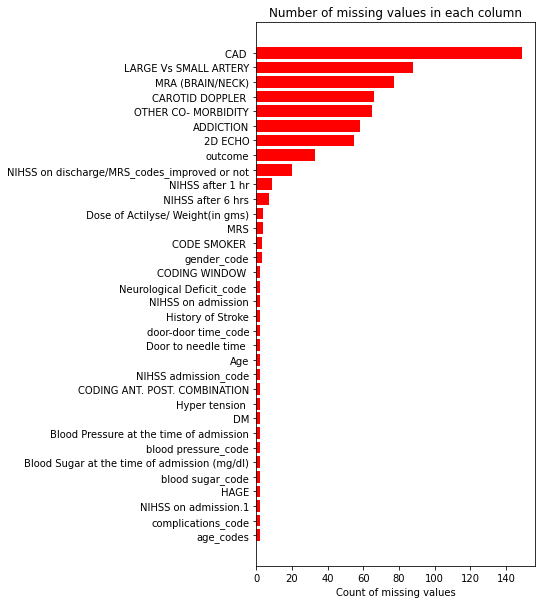

In [0]:
import numpy as np
import matplotlib.pyplot as plt

missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.2
fig, ax = plt.subplots(figsize=(5,10))
rects = ax.barh(ind, missing_df.missing_count.values, color='red')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [0]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [0]:
missing_values_table(df)

Your selected dataframe has 34 columns.
There are 34 columns that have missing values.


,Missing Values,% of Total Values
CAD,149,79.7
LARGE Vs SMALL ARTERY,88,47.1
MRA (BRAIN/NECK),77,41.2
CAROTID DOPPLER,66,35.3
OTHER CO- MORBIDITY,65,34.8
ADDICTION,58,31.0
2D ECHO,55,29.4
outcome,33,17.6
NIHSS on discharge/MRS_codes_improved or not,20,10.7
NIHSS after 1 hr,9,4.8


Remove the columns with >50% missing values

In [0]:
miss=missing_values_table(df)
miss_columns=list(miss[miss['% of Total Values']>50].index)
print(len(miss_columns))

Your selected dataframe has 34 columns.
There are 34 columns that have missing values.
1


In [0]:
df=df.drop(columns=miss_columns,axis=1)

In [0]:
df.isnull().sum().sort_values()

age_codes                                        2
complications_code                               2
NIHSS on admission.1                             2
HAGE                                             2
blood sugar_code                                 2
Blood Sugar at the time of admission (mg/dl)     2
blood pressure_code                              2
Blood Pressure at the time of admission          2
DM                                               2
Hyper tension                                    2
CODING ANT. POST. COMBINATION                    2
NIHSS admission_code                             2
Age                                              2
Door to needle time                              2
door-door time_code                              2
History of Stroke                                2
NIHSS on admission                               2
Neurological Deficit_code                        2
CODING WINDOW                                    2
gender_code                    

# 3. Convertion of data types

In [0]:
df['Blood Pressure at the time of admission']=df['Blood Pressure at the time of admission'].dropna().astype(str)

In [0]:
type(df['Blood Pressure at the time of admission'])

pandas.core.series.Series

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   age_codes                                     185 non-null    float64
 1   Age                                           185 non-null    float64
 2   gender_code                                   184 non-null    float64
 3   Door to needle time                           185 non-null    float64
 4   door-door time_code                           185 non-null    float64
 5   Neurological Deficit_code                     185 non-null    float64
 6   CODING WINDOW                                 185 non-null    float64
 7   NIHSS on admission                            185 non-null    float64
 8   NIHSS admission_code                          185 non-null    float64
 9   MRS                                           183 non-null    flo

In [0]:
dnew=df['Blood Pressure at the time of admission'].str.split("/",n=1,expand=True)
df['systolic']=dnew[0]
df['diastolic']=dnew[1]

In [0]:
df=df.drop(columns=['Blood Pressure at the time of admission'],axis=1)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   age_codes                                     185 non-null    float64
 1   Age                                           185 non-null    float64
 2   gender_code                                   184 non-null    float64
 3   Door to needle time                           185 non-null    float64
 4   door-door time_code                           185 non-null    float64
 5   Neurological Deficit_code                     185 non-null    float64
 6   CODING WINDOW                                 185 non-null    float64
 7   NIHSS on admission                            185 non-null    float64
 8   NIHSS admission_code                          185 non-null    float64
 9   MRS                                           183 non-null    flo

In [0]:
df['systolic']=df['systolic'].dropna().astype(int)

In [0]:
df['diastolic']=df['diastolic'].dropna().astype(int)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   age_codes                                     185 non-null    float64
 1   Age                                           185 non-null    float64
 2   gender_code                                   184 non-null    float64
 3   Door to needle time                           185 non-null    float64
 4   door-door time_code                           185 non-null    float64
 5   Neurological Deficit_code                     185 non-null    float64
 6   CODING WINDOW                                 185 non-null    float64
 7   NIHSS on admission                            185 non-null    float64
 8   NIHSS admission_code                          185 non-null    float64
 9   MRS                                           183 non-null    flo

# 4. Export the df as an excel sheet

In [0]:
df.to_excel('handlenull.xlsx',sheet_name= 'Sheet1')

In [0]:
dt=pd.read_excel('handlenull.xlsx')

In [0]:
from google.colab import files
files.download("handlenull.xlsx")